In [450]:
# Computing confidence intervals for OXT West to determine the importance of sample size, confidence in estimates
# In order to compute the correct standard errors, I use the 80 household and individual-level replicate weights
# from the American Community Survey data (as described here by IPUMS: https://usa.ipums.org/usa/)
# see https://stharrold.github.io/20160110-etl-census-with-python.html for computation of the standard erorrs using
    # replicate weights

In [451]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [452]:
mypath = '/Users/laura/Dropbox/posting/OXTWest'
path_acs_internet = os.path.join(mypath, 'oxtwest_wrepwts.csv')

In [453]:
oxt = pd.read_csv(path_acs_internet)

In [454]:
oxt.head()

,year,datanum,serial,hhwt,repwt,city,gq,rentgrs,foodstmp,lingisol,...,repwtp71,repwtp72,repwtp73,repwtp74,repwtp75,repwtp76,repwtp77,repwtp78,repwtp79,repwtp80
0,2013,1,66410,97,1,"Oakland, CA",Households under 1970 definition,790,Yes,Linguistically isolated,...,176,108,164,172,29,92,28,104,84,92
1,2013,1,66410,97,1,"Oakland, CA",Households under 1970 definition,790,Yes,Linguistically isolated,...,136,94,132,144,24,71,26,98,72,78
2,2013,1,66434,66,1,"San Francisco, CA",Households under 1970 definition,0,No,Not linguistically isolated,...,22,19,71,67,60,59,95,19,68,18
3,2013,1,66436,61,1,"San Francisco, CA",Households under 1970 definition,2170,Yes,Not linguistically isolated,...,65,60,18,53,16,66,80,68,113,112
4,2013,1,66436,61,1,"San Francisco, CA",Households under 1970 definition,2170,Yes,Not linguistically isolated,...,103,87,24,89,29,94,86,107,148,139


In [455]:
oxt['n'] = 1

In [456]:
# labeling the weights
wt = 'repwtp'
wts = [wt+str(inum) for inum in range(1, 81)] # ['repwt1', ..., 'repwt80']

In [457]:
# creating a NO laptop variable
oxt = pd.concat([oxt, pd.get_dummies(oxt["cilaptop"])[[2]]], axis = 1)
# renaming
oxt = oxt.rename(columns = {'Yes':'cilaptop_ind'})

print oxt.groupby(by=['cilaptop_ind'])['n'].sum()

oxt.loc[(oxt['cilaptop_ind'] == 1), 'no_comp'] = 0
oxt.loc[(oxt['cilaptop_ind'] == 0), 'no_comp'] = 1

cilaptop_ind
0                58770
1               209526
Name: n, dtype: int64


In [ ]:
# What does access to Internet at home look like for poor Oakland residents based on age?
# first creating variables needed

In [458]:
# internet access variable codebook
# 0: N/A (GQ)
# 1: Yes, with a subscription to an Internet Service
# 2: Yes, without a subscription to an Internet Service
# 3: No Internet access at this house, apartment, or mobile home

print oxt.groupby(by=['cilaptop'])['perwt'].sum().div(oxt.hhwt.sum()) * 100 # response options

onevar = pd.get_dummies(oxt['cinethh'])
onevar.rename(columns={'No Internet access at this house, apartment, or mobile home':'no_internet'}, inplace=True)
print onevar.head()
# keeping just the second column ("No Internet access at this house, apartment, or mobile home", now "no_internet"), 
# merging to main data set
onevar = onevar[['no_internet']]
oxt = pd.concat([oxt, onevar], axis = 1)

cilaptop
N/A (GQ)     2.557585
No          20.738400
Yes         83.519870
Name: perwt, dtype: float64
   N/A (GQ)  no_internet  Yes, with a subscription to an Internet Service  \
0         0            1                                                0   
1         0            1                                                0   
2         0            0                                                1   
3         0            0                                                1   
4         0            0                                                1   

   Yes, without a subscription to an Internet Service  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   


In [459]:
# Creating the age range variable
print oxt.groupby(by=['age'])['n'].sum() # absolute/sampled numbers
oxt.age[oxt.age == 'Less than 1 year old'] = 0 # recoding
oxt.age[oxt.age == '90 (90+ in 1980 and 1990)'] = 91 # recoding
oxt.age = oxt.age.astype(int)

# Age variable
oxt.loc[(oxt['age'] >= 0) & (oxt['age'] <= 10), 'age_ind'] = '0-10'
oxt.loc[(oxt['age'] >= 11) & (oxt['age'] <= 14), 'age_ind'] = '11-14'
oxt.loc[(oxt['age'] >= 15) & (oxt['age'] <= 18), 'age_ind'] = '15-18'
oxt.loc[(oxt['age'] >= 19) & (oxt['age'] <= 22), 'age_ind'] = '19-22'
oxt.loc[(oxt['age'] >= 22) & (oxt['age'] <= 25), 'age_ind'] = '22-25'
oxt.loc[(oxt['age'] >= 21) & (oxt['age'] <= 29), 'age_ind'] = '26-29'
oxt.loc[(oxt['age'] >= 30) & (oxt['age'] <= 39), 'age_ind'] = '30-39'
oxt.loc[(oxt['age'] >= 40) & (oxt['age'] <= 49), 'age_ind'] = '40-49'
oxt.loc[(oxt['age'] >= 50) & (oxt['age'] <= 59), 'age_ind'] = '50-59'
oxt.loc[(oxt['age'] >= 61), 'age_ind'] = '61+'

age
1      2930
10     2958
11     2828
12     2848
13     2827
14     2775
15     2886
16     3001
17     3118
18     3750
19     3744
2      2842
20     3771
21     3699
22     4062
...
82                           1014
83                            972
84                            955
85                            867
86                            878
87                            724
88                            653
89                            539
9                            2798
90 (90+ in 1980 and 1990)     459
91                            238
93                            103
94                            753
95                            800
Less than 1 year old         2915
Name: n, Length: 95, dtype: int64


In [460]:
# just Oakland:
oxt_oakland = oxt[oxt['city'] == 'Oakland, CA']
print len(oxt.index)

# just poor in Oakland:
oxt_oakland_poor = oxt_oakland[oxt_oakland.poverty < 100]

268296


In [461]:
# defining the function to summarize weighted internet access in the home by age group
grouped = oxt_oakland_poor.groupby('age_ind')
minifun = lambda x: np.average(x.no_internet, weights = x.perwt)
print str(grouped.apply(minifun)) # proportion of poor Oaklanders without internet access in their home

age_ind
0-10       0.317152
11-14      0.329046
15-18      0.180771
19-22      0.155227
26-29      0.220203
30-39      0.273447
40-49      0.264167
50-59      0.351251
61+        0.478935
dtype: float64


In [ ]:
# adding confidence intervals to weighted means using replicate weights

In [462]:
age_grp = ['0-10', '11-14', '15-18', '19-22', '26-29', '30-39', '40-49', '50-59', '61+']

In [463]:
# Saving the replicate-weighted means
means = []

for age in age_grp:
    age_se_mean = []
    for weight in wts:
        age_se_mean.append(float((np.average(oxt_oakland_poor[oxt_oakland_poor['age_ind'] == age]["no_internet"], 
                                                 weights = oxt_oakland_poor[oxt_oakland['age_ind'] == age][weight]))))
        age_meandiff = np.sum(age_se_mean) / 80
    means.append(float(age_meandiff))
    print age_meandiff


0.317562545005
0.327655631392
0.181473949301
0.155636709839
0.220018740074
0.273441168994
0.263988716171
0.35104464947
0.478908082798


In [464]:
# making data frame of age groups and means...
age_df = pd.DataFrame({'age_grp': age_grp, 'means': means})
print age_df

  age_grp     means
0    0-10  0.317563
1   11-14  0.327656
2   15-18  0.181474
3   19-22  0.155637
4   26-29  0.220019
5   30-39  0.273441
6   40-49  0.263989
7   50-59  0.351045
8     61+  0.478908


In [465]:
# Computing the standard errors for internet access in each age group...

age_se_all = [] # for holding the 80 differences
age_ses = [] # for holding the standard errors before averaging

for age in age_grp:
    for weight in wts:
        age_se_all.append(float((np.average(oxt_oakland_poor[oxt_oakland_poor['age_ind'] == age]["no_internet"], 
                                                 weights = oxt_oakland_poor[oxt_oakland_poor['age_ind'] == age][weight])) - 
                                                      age_df[age_df['age_grp'] == age]["means"]) ** 2)
    se = (np.sum(age_se_all) * .05) ** .5
    print se
    age_se_all = [] # clearing the list of 80
    age_ses.append(float(se))
print age_ses    

0.0483297914402
0.0654660467234
0.0477533490329
0.050011414039
0.0363654264178
0.0410976333568
0.0416232763455
0.0437529009122
0.0381072231031
[0.048329791440175705, 0.06546604672337289, 0.04775334903287616, 0.05001141403896587, 0.0363654264178082, 0.041097633356773536, 0.04162327634554945, 0.043752900912232044, 0.03810722310307676]


In [466]:
print oxt.groupby(by = ['age_ind'])['n'].sum()

age_ind
0-10       32063
11-14      11278
15-18      12755
19-22       7515
26-29      39100
30-39      39324
40-49      34531
50-59      35782
61+        52508
Name: n, dtype: int64


In [ ]:
# data frame with means and standard errors

In [467]:
age_df = pd.DataFrame({'age_grp': age_grp, 'means': means, 'se': age_ses})
print age_df

  age_grp     means        se
0    0-10  0.317563  0.048330
1   11-14  0.327656  0.065466
2   15-18  0.181474  0.047753
3   19-22  0.155637  0.050011
4   26-29  0.220019  0.036365
5   30-39  0.273441  0.041098
6   40-49  0.263989  0.041623
7   50-59  0.351045  0.043753
8     61+  0.478908  0.038107


In [468]:
# computing the confidence intervals
age_df['lower'] = age_df['means'] - (1.96 * age_df['se'])
age_df['upper'] = age_df['means'] + (1.96 * age_df['se'])
print age_df

  age_grp     means        se     lower     upper
0    0-10  0.317563  0.048330  0.222836  0.412289
1   11-14  0.327656  0.065466  0.199342  0.455969
2   15-18  0.181474  0.047753  0.087877  0.275071
3   19-22  0.155637  0.050011  0.057614  0.253659
4   26-29  0.220019  0.036365  0.148743  0.291295
5   30-39  0.273441  0.041098  0.192890  0.353993
6   40-49  0.263989  0.041623  0.182407  0.345570
7   50-59  0.351045  0.043753  0.265289  0.436800
8     61+  0.478908  0.038107  0.404218  0.553598


In [469]:
age_df_graph = age_df

# multiplying means and se by 100 to get proportion rather than percent
age_df_graph["means"] = age_df_graph["means"] * 100
age_df_graph["se"] = age_df_graph["se"] * 100

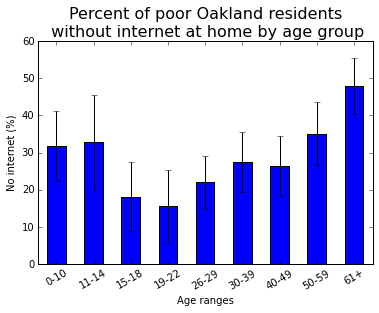

In [474]:
# Graphing
age_df_graph.index = age_df_graph["age_grp"]
ax = age_df_graph['means'].plot(kind = 'bar', yerr = (age_df_graph['se']) * 1.96)
ax.set_ylabel("No internet (%)")
ax.set_xlabel("Age ranges")
ax.grid(b = False)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)
plt.title('Percent of poor Oakland residents \n without internet at home by age group', size=16) # household level
plt.savefig('/Users/laura/Dropbox/posting/OXTWest/age.png', bbox_inches='tight', dpi = 200)

In [ ]:
# How does computer ownership of poor residents in Oakland compare with other US cities?

In [475]:
# keeping just poor
oxt_poor = oxt[oxt.poverty < 100]

In [476]:
# function to compute proportion without a computer by group
grouped = oxt_poor.groupby('city')
minifun = lambda x: np.average(x.no_comp, weights = x.perwt)
print str(grouped.apply(minifun))

city
Chicago, IL          0.463431
Cleveland, OH        0.546172
Detroit, MI          0.504711
Flint, MI            0.559227
Manchester, NH       0.376820
Miami, FL            0.470422
Minneapolis, MN      0.397932
New Orleans, LA      0.577662
New York, NY         0.383169
Oakland, CA          0.434421
Providence, RI       0.555197
San Francisco, CA    0.381865
Seattle, WA          0.356036
dtype: float64


In [ ]:
# computing standard errors for each city mean....

In [477]:
mini_cities = grouped.apply(minifun)
print mini_cities
city_list = mini_cities.index.values.tolist()
print city_list

city
Chicago, IL          0.463431
Cleveland, OH        0.546172
Detroit, MI          0.504711
Flint, MI            0.559227
Manchester, NH       0.376820
Miami, FL            0.470422
Minneapolis, MN      0.397932
New Orleans, LA      0.577662
New York, NY         0.383169
Oakland, CA          0.434421
Providence, RI       0.555197
San Francisco, CA    0.381865
Seattle, WA          0.356036
dtype: float64
['Chicago, IL', 'Cleveland, OH', 'Detroit, MI', 'Flint, MI', 'Manchester, NH', 'Miami, FL', 'Minneapolis, MN', 'New Orleans, LA', 'New York, NY', 'Oakland, CA', 'Providence, RI', 'San Francisco, CA', 'Seattle, WA']


In [478]:
# Saving the replicate-weighted means for each city
city_means = []

for city in city_list:
    city_se_mean = []
    for weight in wts:
        city_se_mean.append(float((np.average(oxt_poor[oxt_poor['city'] == city]["no_comp"], 
                                                 weights = oxt_poor[oxt_poor['city'] == city][weight]))))
        city_meandiff = np.sum(city_se_mean) / 80
    city_means.append(city_meandiff)
    print str(city) + " = " + str(city_meandiff)

Chicago, IL = 0.463415157627
Cleveland, OH = 0.546390377356
Detroit, MI = 0.50479516452
Flint, MI = 0.557815507116
Manchester, NH = 0.377633434154
Miami, FL = 0.470315785062
Minneapolis, MN = 0.39829477716
New Orleans, LA = 0.577234884952
New York, NY = 0.383163739904
Oakland, CA = 0.434282010988
Providence, RI = 0.554278442952
San Francisco, CA = 0.381893440409
Seattle, WA = 0.35636592331


In [479]:
# making data frame of age groups and means...
city_df = pd.DataFrame({'city': city_list, 'means': city_means})
print city_df

                 city     means
0         Chicago, IL  0.463415
1       Cleveland, OH  0.546390
2         Detroit, MI  0.504795
3           Flint, MI  0.557816
4      Manchester, NH  0.377633
5           Miami, FL  0.470316
6     Minneapolis, MN  0.398295
7     New Orleans, LA  0.577235
8        New York, NY  0.383164
9         Oakland, CA  0.434282
10     Providence, RI  0.554278
11  San Francisco, CA  0.381893
12        Seattle, WA  0.356366


In [480]:
# Computing the standard errors for each city's mean

city_se_all = [] # for holding the 80 differences
city_ses = [] # for holding the standard errors

for city in city_list:
    for weight in wts:
        city_se_all.append(float((np.average(oxt_poor[oxt_poor['city'] == city]["no_comp"], 
                                                 weights = oxt_poor[oxt_poor['city'] == city][weight])) - 
                                                      city_df[city_df['city'] == city]["means"]) ** 2)
    se = (np.sum(city_se_all) * .05) ** .5
    print se
    city_se_all = [] # clearing the list of 80
    city_ses.append(float(se))
print city_ses   

0.0108863152875
0.0227630673181
0.0177552244864
0.0464320660241
0.0528620098412
0.0175222635073
0.0265577266899
0.0197373759945
0.00540260762714
0.0243048288588
0.0288893991624
0.0185023648112
0.0198967110244
[0.010886315287513007, 0.022763067318143582, 0.01775522448642626, 0.046432066024134154, 0.05286200984117941, 0.017522263507314086, 0.026557726689872257, 0.01973737599451846, 0.005402607627138789, 0.02430482885884329, 0.02888939916243583, 0.018502364811156743, 0.019896711024438532]


In [481]:
city_df = pd.DataFrame({'city': city_list, 'means': city_means, 'se': city_ses})
print city_df

                 city     means        se
0         Chicago, IL  0.463415  0.010886
1       Cleveland, OH  0.546390  0.022763
2         Detroit, MI  0.504795  0.017755
3           Flint, MI  0.557816  0.046432
4      Manchester, NH  0.377633  0.052862
5           Miami, FL  0.470316  0.017522
6     Minneapolis, MN  0.398295  0.026558
7     New Orleans, LA  0.577235  0.019737
8        New York, NY  0.383164  0.005403
9         Oakland, CA  0.434282  0.024305
10     Providence, RI  0.554278  0.028889
11  San Francisco, CA  0.381893  0.018502
12        Seattle, WA  0.356366  0.019897


In [482]:
# computing the confidence intervals
city_df['lower'] = city_df['means'] - (1.96 * city_df['se'])
city_df['upper'] = city_df['means'] + (1.96 * city_df['se'])
print city_df

                 city     means        se     lower     upper
0         Chicago, IL  0.463415  0.010886  0.442078  0.484752
1       Cleveland, OH  0.546390  0.022763  0.501775  0.591006
2         Detroit, MI  0.504795  0.017755  0.469995  0.539595
3           Flint, MI  0.557816  0.046432  0.466809  0.648822
4      Manchester, NH  0.377633  0.052862  0.274024  0.481243
5           Miami, FL  0.470316  0.017522  0.435972  0.504659
6     Minneapolis, MN  0.398295  0.026558  0.346242  0.450348
7     New Orleans, LA  0.577235  0.019737  0.538550  0.615920
8        New York, NY  0.383164  0.005403  0.372575  0.393753
9         Oakland, CA  0.434282  0.024305  0.386645  0.481919
10     Providence, RI  0.554278  0.028889  0.497655  0.610902
11  San Francisco, CA  0.381893  0.018502  0.345629  0.418158
12        Seattle, WA  0.356366  0.019897  0.317368  0.395363


In [483]:
city_df = city_df.sort(['means'], ascending = [0])
print city_df

                 city     means        se     lower     upper
7     New Orleans, LA  0.577235  0.019737  0.538550  0.615920
3           Flint, MI  0.557816  0.046432  0.466809  0.648822
10     Providence, RI  0.554278  0.028889  0.497655  0.610902
1       Cleveland, OH  0.546390  0.022763  0.501775  0.591006
2         Detroit, MI  0.504795  0.017755  0.469995  0.539595
5           Miami, FL  0.470316  0.017522  0.435972  0.504659
0         Chicago, IL  0.463415  0.010886  0.442078  0.484752
9         Oakland, CA  0.434282  0.024305  0.386645  0.481919
6     Minneapolis, MN  0.398295  0.026558  0.346242  0.450348
8        New York, NY  0.383164  0.005403  0.372575  0.393753
11  San Francisco, CA  0.381893  0.018502  0.345629  0.418158
4      Manchester, NH  0.377633  0.052862  0.274024  0.481243
12        Seattle, WA  0.356366  0.019897  0.317368  0.395363


In [484]:
# multiplying means and se by 100...
city_df_graph = city_df
# to get proportion rather than percent
city_df_graph["means"] = city_df_graph["means"] * 100
city_df_graph["se"] = city_df_graph["se"] * 100

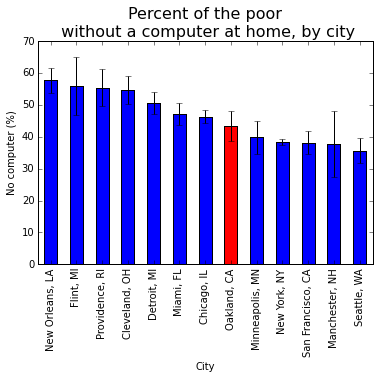

In [486]:
city_df_graph.index = city_df_graph["city"]
ax = city_df_graph['means'].plot(kind = 'bar', yerr = (city_df_graph['se']) * 1.96,
                                color = ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b'])
ax.set_ylabel("No computer (%)")
ax.set_xlabel("City")
ax.grid(b = False)
plt.title('Percent of the poor \n without a computer at home, by city', size = 16) # household level
plt.savefig('/Users/laura/Dropbox/posting/OXTWest/city.png', bbox_inches='tight', dpi = 200)

In [ ]:
# What does computer ownership look like with the employment status (EMPSTAT) variable
# NOTE: I am doing this just for Oakland

In [519]:
# Proportion of each empstat category with computer
# first creating the no_comp variable:
oxt_oakland = oxt[oxt['city'] == 'Oakland, CA']
grouped = oxt_oakland.groupby('empstat')
minifun = lambda x: np.average(x.no_comp, weights = x.perwt)
empstats = grouped.apply(minifun)
print str(grouped.apply(minifun)) 

empstat
Employed              0.120885
Not in labor force    0.302571
Unemployed            0.253451
dtype: float64


In [520]:
# saving the relavent means...

emp_mean = empstats.iloc[0] # employed
unemp_mean = empstats.iloc[2] # unemployed

print unemp_mean
print emp_mean

0.253451442152
0.120884531353


In [521]:
print oxt_oakland.groupby(by = ['empstat'])['n'].sum() # quickly looking at sample sizes

empstat
Employed              4493
Not in labor force    2587
Unemployed             443
Name: n, dtype: int64


In [522]:
# Computing the proportion of employed Oakland residents with no computer (using replicate weights)
oxt_oakland_emp = oxt_oakland[oxt_oakland['empstat'] == 'Employed']
empstat_se = []

empstat_se_mean = []

for weight in wts:
    empstat_se_mean.append(float((np.average(oxt_oakland_emp["no_comp"], weights = oxt_oakland_emp[weight]))))
emp_meandiff = np.sum(empstat_se_mean) / 80
print emp_meandiff

0.120749312977


In [523]:
# Computing the proportion of unemployed Oakland residents with no computer (using replicate weights)
oxt_oakland_unemp = oxt_oakland[oxt_oakland['empstat'] == 'Unemployed']
unempstat_se = []

unempstat_se_mean = []

for weight in wts:
    unempstat_se_mean.append(float((np.average(oxt_oakland_unemp["no_comp"], weights = oxt_oakland_unemp[weight]))))
unemp_meandiff = np.sum(unempstat_se_mean) / 80
print unemp_meandiff

0.253637302145


In [511]:
# Standard error for the employed
for weight in wts:
    empstat_se.append(float((np.average(oxt_oakland_emp["no_comp"], weights = oxt_oakland_emp[weight]) - emp_meandiff) ** 2))
empstat_ses = (np.sum(empstat_se) * .05) ** .5

print empstat_ses

print "Standard error for proportion employed without a computer = " + str(empstat_ses)

0.00805891188154
Standard error for proportion employed without a computer = 0.00805891188154


In [524]:
# Standard error for the unemployed
for weight in wts:
    unempstat_se.append(float((np.average(oxt_oakland_unemp["no_comp"], weights = oxt_oakland_unemp[weight]) - unemp_meandiff) ** 2))
unempstat_ses = (np.sum(unempstat_se) * .05) ** .5

print unempstat_ses

print "Standard error for proportion unemployed without a computer = " + str(unempstat_ses)

0.0247170047675
Standard error for proportion unemployed without a computer = 0.0247170047675


In [525]:
# What does computer ownership look like with the employment status (EMPSTAT) variable
# NOTE: I am doing this just for Oakland

print "Percent of employed without computer = " + str(round(emp_mean * 100, 1)) + \
    "% (CI = " + str(round(((emp_mean - (1.96*empstat_ses)) * 100), 1)) + "% , " + \
    str(round(((emp_mean + (1.96*empstat_ses)) * 100), 1)) + "%)"

print "Percent of unemployed without computer = " + str(round(unemp_mean * 100, 1)) + \
    "% (CI = " + str(round(((unemp_mean - (1.96*unempstat_ses)) * 100), 1)) + "% , " + \
    str(round(((unemp_mean + (1.96*unempstat_ses)) * 100), 1)) + "%)"   

Percent of employed without computer = 12.1% (CI = 10.5% , 13.7%)
Percent of unemployed without computer = 25.3% (CI = 20.5% , 30.2%)


In [ ]:
# What does Internet and computer access look like by race/ethnicity?

In [496]:
# variable for Black only, white only, Hispanic origin only, other (including mixed race) - only in Oakland
oxt_oakland.loc[(oxt_oakland['race'] == "Black/Negro"), 'race_var'] = 'Black only'
oxt_oakland.loc[(oxt_oakland['race'] == "White"), 'race_var'] = 'White only'
oxt_oakland.loc[(oxt_oakland['hispan'] != "Not Hispanic"), 'race_var'] = 'Hispanic'
oxt_oakland['race_var'].fillna('Other', inplace = True)

print oxt_oakland.groupby(by = ['race_var'])['n'].sum()

race_var
Black only    1882
Hispanic      2118
Other         2110
White only    2983
Name: n, dtype: int64


/Users/laura/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame


In [497]:
race_list = ['Black only', 'Hispanic', 'Other', 'White only']

In [498]:
# Saving the replicate-weighted means for each race/ethnicity
race_means = []

for race in race_list:
    race_se_mean = []
    for weight in wts:
        race_se_mean.append(float((np.average(oxt_oakland[oxt_oakland['race_var'] == race]["no_internet"], 
                                                 weights = oxt_oakland[oxt_oakland['race_var'] == race][weight]))))
        race_meandiff = np.sum(race_se_mean) / 80
    race_means.append(float(race_meandiff))
    print race_meandiff

0.232411474228
0.219767069167
0.112896282138
0.0494528725257


In [499]:
# making data frame of age groups and means...
race_df = pd.DataFrame({'race': race_list, 'means': race_means})
print race_df

      means        race
0  0.232411  Black only
1  0.219767    Hispanic
2  0.112896       Other
3  0.049453  White only


In [500]:
# Computing the standard errors for internet access in each race/ethnicity...

race_se_all = [] # for holding the 80 differences
race_ses = [] # for holding the standard errors

for race in race_list:
    for weight in wts:
        race_se_all.append(float((np.average(oxt_oakland[oxt_oakland['race_var'] == race]["no_internet"], 
                                                 weights = oxt_oakland[oxt_oakland['race_var'] == race][weight])) - 
                                                      race_df[race_df['race'] == race]["means"]) ** 2)
    se = (np.sum(race_se_all) * .05) ** .5
    print se
    race_se_all = [] # clearing the list of 80
    race_ses.append(float(se))
print race_ses  

0.0197341909634
0.0198668849235
0.0112672410218
0.00458884510785
[0.019734190963415145, 0.019866884923549127, 0.011267241021763281, 0.004588845107852961]


In [501]:
race_df = pd.DataFrame({'race': race_list, 'means': race_means, 'se': race_ses})
print race_df

      means        race        se
0  0.232411  Black only  0.019734
1  0.219767    Hispanic  0.019867
2  0.112896       Other  0.011267
3  0.049453  White only  0.004589


In [502]:
# computing the confidence intervals
race_df['lower'] = race_df['means'] - (1.96 * race_df['se'])
race_df['upper'] = race_df['means'] + (1.96 * race_df['se'])
print race_df

      means        race        se     lower     upper
0  0.232411  Black only  0.019734  0.193732  0.271090
1  0.219767    Hispanic  0.019867  0.180828  0.258706
2  0.112896       Other  0.011267  0.090812  0.134980
3  0.049453  White only  0.004589  0.040459  0.058447


In [503]:
# graphing
race_df = race_df.sort(['means'], ascending = [0])
print race_df

      means        race        se     lower     upper
0  0.232411  Black only  0.019734  0.193732  0.271090
1  0.219767    Hispanic  0.019867  0.180828  0.258706
2  0.112896       Other  0.011267  0.090812  0.134980
3  0.049453  White only  0.004589  0.040459  0.058447


In [504]:
# Graphing internet access by race/ethnicity
race_df_graph = race_df
# percent rather than proportion...
race_df_graph["means"] = race_df_graph["means"] * 100
race_df_graph["se"] = race_df_graph["se"] * 100

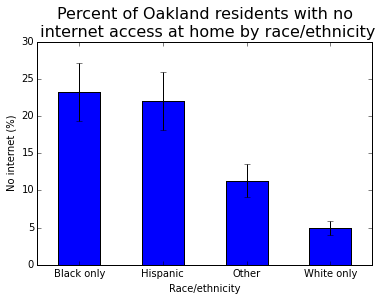

In [505]:
race_df_graph.index = race_df_graph["race"]
ax = race_df_graph['means'].plot(kind = 'bar', yerr = (race_df_graph['se']) * 1.96)
ax.set_ylabel("No internet (%)")
ax.set_xlabel("Race/ethnicity")
ax.grid(b = False)
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 0, fontsize = 10)

plt.title('Percent of Oakland residents with no \n internet access at home by race/ethnicity', size=16) 
plt.savefig('/Users/laura/Dropbox/posting/OXTWest/raceeth.png', bbox_inches='tight', dpi = 200)